# można używać tylko tych bibliotek, które są załadowane, reszta z palca ma być pisana 

# Projekt Indywidualny 2022/2023
Zadaniem tego projektu jest potwierdzenie posiadania przez Państwa umiejętności budowania modelu regresji na przykładzie danych zawierających ceny nieruchomości znajdujących się w pliku "domy.csv". W zadaniu należy wykorzystać wiedzę poznaną na laboratorium i wykładzie w tym metody regularyzacji, metody wyboru i tworzenia nowych zmiennych, określenie jakości modelu, metody optymalizacji.

Za projekt można zdobyć 50 pkt. Za każde zadanie można dostać od 0 do 5 pkt. Każde zadanie musi być opisane stosownymi komentarzami i podsumowane wnioskami wynikającymi z wykonanych obliczeń.

**!!! Do wykonania projektu nie możemy korzystać z żadnych dodatkowych pakietów niż poniższe 5 !!!**

Czas na wykonanie projektu - 31.12.2022 r.

jakie matematyczne można           byle optymalizatory były własnoręcznie

In [1]:
# Wyczanie pakietów podstawowych
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

C:\Users\krukd\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
import re

In [3]:
# Wczytanie danych
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
domy = pd.read_csv("domy.csv", sep=',', dtype=dtype_dict)
domy

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0263000018,20140521T000000,360000.0,3.0,2.50,1530.0,1131,3,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530.0,1509.0
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310.0,5813,2,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830.0,7200.0
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020.0,1350,2,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020.0,2007.0
21611,0291310100,20150116T000000,400000.0,3.0,2.50,1600.0,2388,2,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410.0,1287.0


### Podział danych zostanie dokonany zależnie od numeru indeksu

In [4]:
# !!!Jako random_state podaj swój numer indeksu!!!
numer_indeksu = 324244
ceny = domy['price']
domy.drop('price', axis=1, inplace=True)
domy_train, domy_test, ceny_train, ceny_test = train_test_split(domy, ceny, test_size=0.33, random_state=numer_indeksu)
cechy = domy.columns.values
cechy 

array(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'], dtype=object)

## Zadanie 1
Dokonaj analizy posiadanych zmiennych. Zakresy zmienności, korelacje, skośność. Dane nieużyteczne jak np. id można pominąć.

In [5]:
domy.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,3.0,1.00,1180.0,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,3.0,2.25,2570.0,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,2.0,1.00,770.0,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,4.0,3.00,1960.0,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,3.0,2.00,1680.0,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


In [6]:
domy.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,0.930062,0.770163,918.440897,4.142051e+04,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,0.000000,0.000000,290.000000,5.200000e+02,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
domy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  object 
 1   date           21613 non-null  object 
 2   bedrooms       21613 non-null  float64
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  float64
 5   sqft_lot       21613 non-null  int32  
 6   floors         21613 non-null  object 
 7   waterfront     21613 non-null  int32  
 8   view           21613 non-null  int32  
 9   condition      21613 non-null  int32  
 10  grade          21613 non-null  int32  
 11  sqft_above     21613 non-null  int32  
 12  sqft_basement  21613 non-null  int32  
 13  yr_built       21613 non-null  int32  
 14  yr_renovated   21613 non-null  int32  
 15  zipcode        21613 non-null  object 
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [8]:
# sns.set(rc={'figure.figsize':(12,9)})
# col_iter = 0
# for col in domy.columns:
#     if col != "id" and col != "date" and col != "zipcode":
#         sns.histplot(domy[col])
#         plt.show()
#     col_iter += 1

eliminuje wszystko poza int/float, ponieważ chce wykonać numeryczne modyfikacje

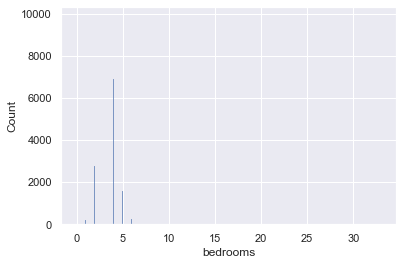

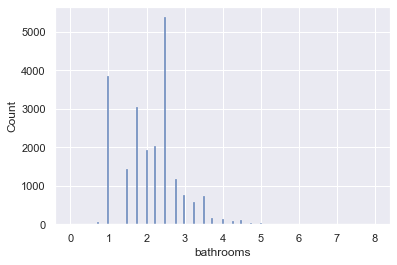

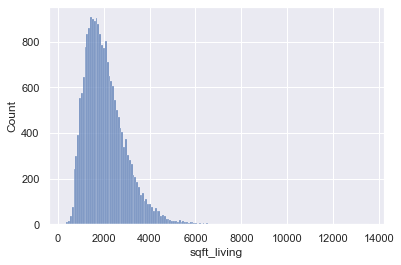

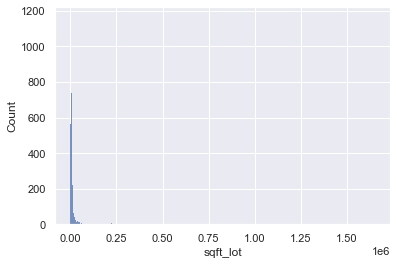

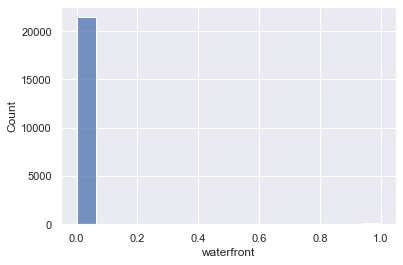

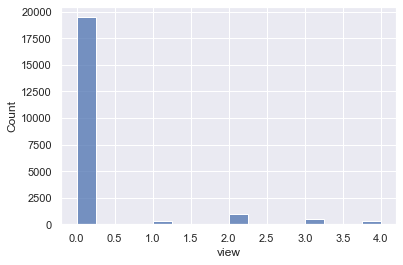

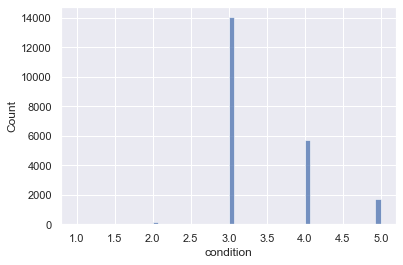

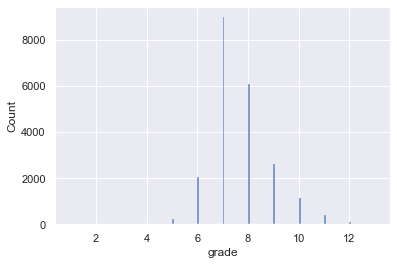

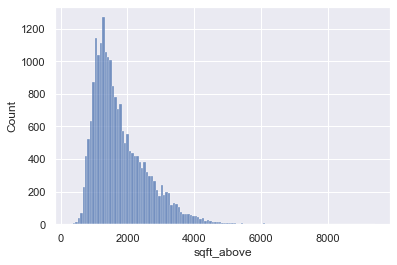

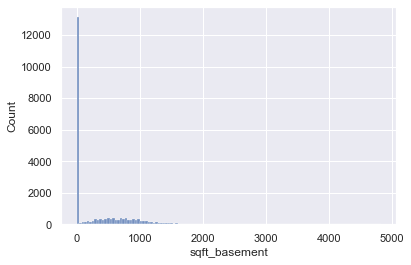

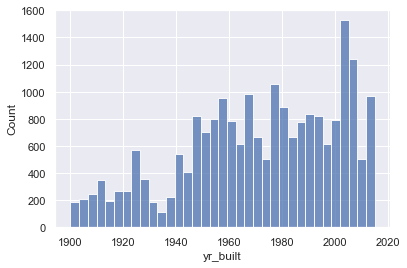

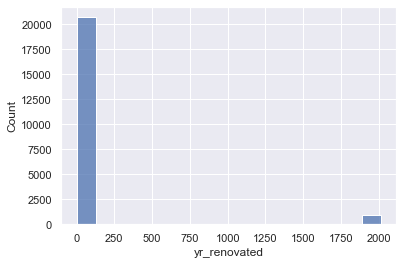

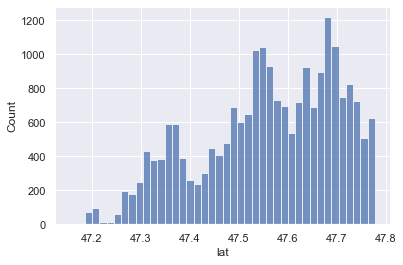

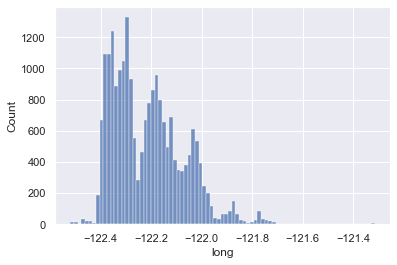

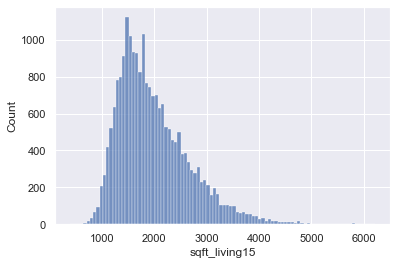

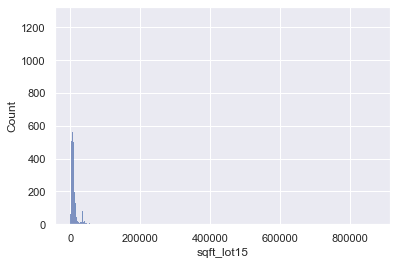

In [9]:
sns.set(rc={'figure.figsize':(12,9)})
col_iter = 0
for col in domy.columns:
    if re.match('^float', str(domy.dtypes[col])) or re.match('^int', str(domy.dtypes[col])):
        sns.histplot(domy[col])
        plt.show()
    col_iter += 1

* sqft_living prawostronny -> dać log |
* sqrf_lot też prawostronny? |
	na pewno można lepiej splotować |
* waterfront 0/1? jak tak, to coś z tym robić? |
* sqft_above (Above Grade Square Feet is the term referring to all living square feet in a home that is above the ground) prawostronny -> dać log |
* sqft_basement ma 0, może to jakoś podzielić na sqft_basement > 0 i te reszta? |
* to samo z yr_renovated |
* long prawostronny? |
* sqft_living15 prawostronny? czy on się czymś różni od po prostu sqft_living? |
* to samo z sqft_lot15

In [10]:
#domy['sqft_living_LOG'] = domy.apply(lambda row: domy['sqft_living'], axis=1)

In [27]:
nowe_cech = domy.copy()

In [30]:
domy['sqft_living_LOG'] = np.log(domy['sqft_living'])
try:
    nowe_cech = nowe_cech.drop('sqft_living', axis=1)
except KeyError:
    pass
nowe_cech['sqft_living_LOG'] = domy['sqft_living_LOG']

In [31]:
domy['sqft_lot_LOG'] = np.log(domy['sqft_lot'])
try:
    nowe_cech = nowe_cech.drop('sqft_lot', axis=1)
except KeyError:
    pass
nowe_cech['sqft_lot_LOG'] = domy['sqft_lot_LOG']

In [14]:
# floors to string

In [32]:
domy['sqft_above_LOG'] = np.log(domy['sqft_above'])
try:
    nowe_cech = nowe_cech.drop('sqft_above', axis=1)
except KeyError:
    pass
nowe_cech['sqft_above_LOG'] = domy['sqft_above_LOG']

In [33]:
domy['bed_bath_rooms'] = domy['bedrooms']*domy['bathrooms']
try:
    nowe_cech = nowe_cech.drop('bedrooms', axis=1)
    nowe_cech = nowe_cech.drop('bathrooms', axis=1)
except KeyError:
    pass
nowe_cech['bed_bath_rooms'] = domy['bed_bath_rooms']

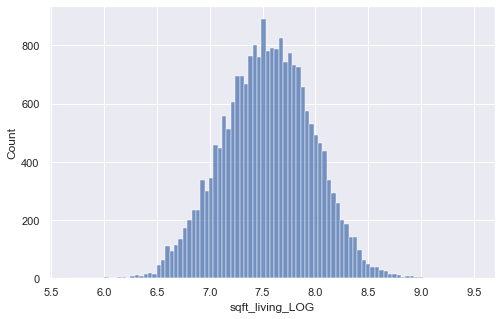

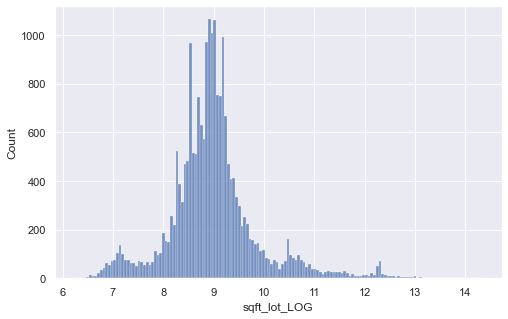

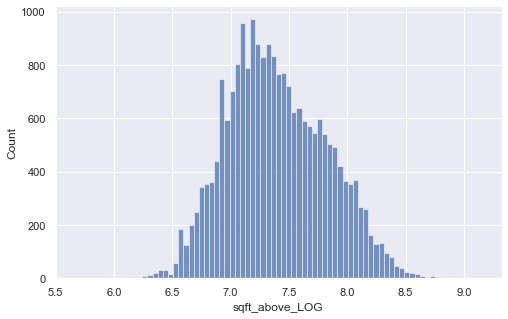

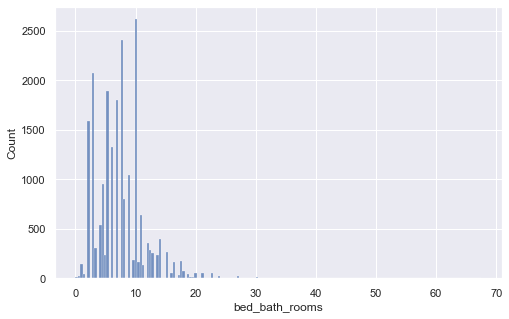

In [17]:
sns.set(rc={'figure.figsize':(8,5)})
for i, col in enumerate(domy.columns):
    if (re.match('^float', str(domy.dtypes[col])) or re.match('^int', str(domy.dtypes[col]))) and i >= col_iter:
        sns.histplot(domy[col])
        plt.show()

* sqft_lot wychodzi NIE unimodalnie
* sqft_living 👍
* sqft_above 👍
* dodanie interakcji pomiedzy bedrooms, bathrooms - przez pomnożenie tych wartości

<AxesSubplot:>

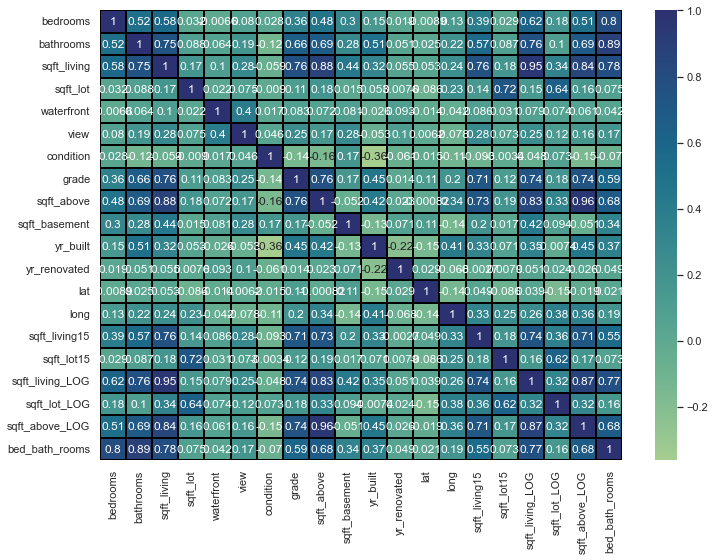

In [34]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(domy.corr(),annot = domy.corr(), cmap="crest", linewidths=2, linecolor='black')

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(domy.corr(),annot = domy.corr(), cmap="crest", linewidths=2, linecolor='black')

# co z "id", "date", "zipcode"?

* waterfront 0/1? jak tak, to coś z tym robić? |
* sqft_basement ma 0, może to jakoś podzielić na sqft_basement > 0 i te reszta? |
* to samo z yr_renovated |
* long prawostronny? |
* sqft_living15 prawostronny? czy on się czymś różni od po prostu sqft_living? |
* to samo z sqft_lot15

In [19]:
domy.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sqft_living_LOG', 'sqft_lot_LOG',
       'sqft_above_LOG', 'bed_bath_rooms'],
      dtype='object')

In [20]:
# Funkcja szukająca współczynników modelu
def model_train(X_train, Y_train):
    # Wylicza współczynniki modelu wykorzystując pseudoodwrotność
    pinw = np.linalg.pinv(X_train)
    model = np.dot(pinw, Y_train)
    return(model)

In [21]:
def predict_output(data, w):
    return np.dot(data, w)

In [22]:
def policz_SSE(model, data, outcome):
    # Wylicz przewidywaną wartość
    pred = predict_output(data, model)
    # Policz błąd bezwzglęny
    error = outcome - pred
    # Podnieś błędy do kwadratu i zsumuj je
    SSE = sum(np.square(error))
    return(SSE)    

## Zadanie 2
Zaproponuj 5 nowych cech będących wynikiem przeprowadzonych w ramach Zadaniu 1 analiz lub doświadczeń.

## Zadanie 3
Dokonaj wizualiazji nowych cech i określ ich korelację.

## Zadanie 4

Wyznacz liniową zależność między 3 najbardziej skorelowanymi ze zmienną opisywaną zmiennymi opisującymi (wszystkie podane cechy + 5 nowo utworzonych). Do wyznaczenia liniowej zależności między cechami, a zmienną opisywaną wykorzystaj pseudoinwersję.

#### OPISYWANĄ I OPISANYMI. pseudoinwersje można funkcją numpy-ową

## Zadanie 5
Napisz metodę regresji krokowej w tył i za jej pomocą wybierz 5 najbardziej wartościowych cech.

## Zadanie 6
Dokonaj normalizacji cech (wszystkie podane + 5 zaproponowanych w Zadaniu 1) i przy pomocy metody Lasso lub LARS (metody mają zostać samodzielnie zaimplementowane) wybierz 5 najbardziej wartościowych cech.

**!!! Przy przekształceniach unikaj korzystania z informacji zawartej w zbiorze walidacyjnym i testowym !!!**

#### normalizacja żeby było łatwiej. implementowane było lasso i można jej użyć, można jak się chce LARS samemu zaimplementować. mamy 3 zbiory dlatego na uczenia

## Zadanie 7
Zaimplementuj metodę spadku gradientów dla regularyzacji grzebietowej. Zabezpiecz się przed zbyt dużym współczynnikiem uczenia, badając zbieżność w każdym kroku i w razie potrzeby zmniejszając współczynnik uczenia $\sqrt{2}$ razy.

#### było na wykładzie. wystarczy wstawić współczynnik i powinno działać

## Zadanie 8
Dla 5 wybranych w Zadaniu 5 cech dokonaj doboru współczynnika regularyzacji dla metody grzbietowej. 

*Skorzystaj z własnej implementacji regresji z Zadania 7. Zacznij od wysokiego współczynnika uczenia.*

## Zadanie 9
Wytrenuj 5 modeli:
1. Wykorzystujący wszystkie cechy dane w zbiorze.
2. Wykorzystujący wszystkie cechy dane w zbiorze + 5 zaproponowanych.
3. Wykorzystujący 5 cech wybranych regresją krokową w tył.
4. Wykorzystujące tylko cechy wybrane dzięki metodzie Lasso.
5. Wykorzystujące cechy wybrane w metodzie Lasso i poddane regularyzacji grzbietowej dla wybranego współczynnika regularyzacji.

#### trenujemy różne modele każdy model 1 pkt

## Zadanie 10
Dokonaj oceny i porównania modeli z Zadania 9. Wybierz najlepszy model.

#### porównanie na zbiorze testowym. jeżeli się uprę mogę cały uczący. !!!!!w reszcie robić walidację krzyżową